In [ ]:
import calendar
import os

import matplotlib
import matplotlib.pylab as plt
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.plotting import parallel_coordinates, scatter_matrix
from sklearn import preprocessing

from pandas_util import load_boston_housing, normalize_columns

In [ ]:
housing_df = load_boston_housing()
housing_df.sample(5)

In [3]:
amtrak_df = pd.read_csv("./datasets/dmba/Amtrak.csv")
normalize_columns(amtrak_df)

amtrak_df["date"] = pd.to_datetime(amtrak_df.month, format="%d/%m/%Y")
ridership_ts = pd.Series(amtrak_df.ridership.values, index=amtrak_df.date)
ridership_ts

date
1991-01-01    1708.917
1991-02-01    1620.586
1991-03-01    1972.715
1991-04-01    1811.665
1991-05-01    1974.964
                ...   
2003-11-01    2076.054
2003-12-01    2140.677
2004-01-01    1831.508
2004-02-01    1838.006
2004-03-01    2132.446
Length: 159, dtype: float64

## Plotting with Pandas

Text(0, 0.5, 'Ridership (in 000s)')

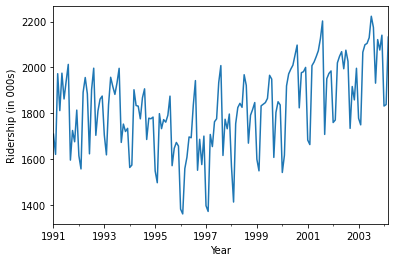

In [4]:
# Line graph.
ridership_ts.plot()
plt.xlabel("Year")
plt.ylabel("Ridership (in 000s)")

<AxesSubplot:xlabel='lstat', ylabel='medv'>

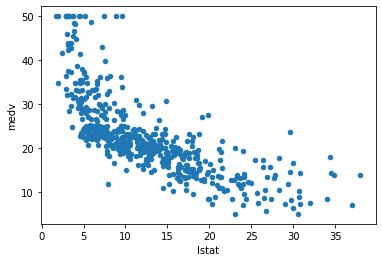

In [5]:
# Scatter plot with axes names
housing_df.plot.scatter(x="lstat", y="medv")

Text(0, 0.5, 'Avg. MEDV')

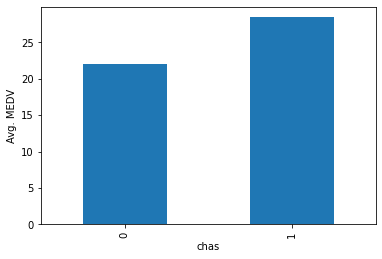

In [6]:
# Barchart of "chas" vs mean "medv"
ax = housing_df.groupby("chas").mean().medv.plot.bar()
ax.set_ylabel("Avg. MEDV")

Text(0, 0.5, 'CAT. MEDV')

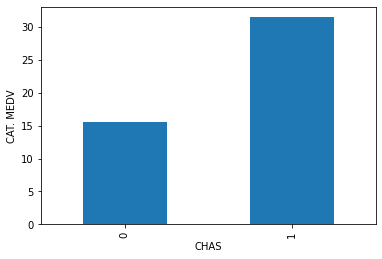

In [7]:
# Barchart of "chas" vs "cat_medv"
data_for_plot = housing_df.groupby("chas").mean().cat_medv * 100
ax = data_for_plot.plot.bar()
ax.set_xlabel("CHAS")
ax.set_ylabel("CAT. MEDV")

## Plotting with Matplotlib

When possible, plot it directly with Pandas as the API is more concise.

Text(0, 0.5, 'Ridership (in 000s)')

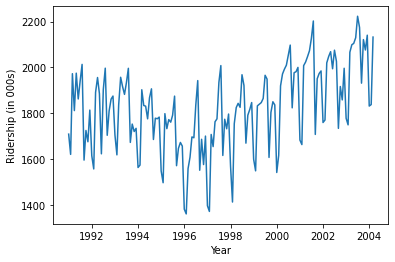

In [8]:
%matplotlib inline

# Line graph
plt.plot(ridership_ts.index, ridership_ts)
plt.xlabel("Year")
plt.ylabel("Ridership (in 000s)")

Text(0, 0.5, 'MEDV')

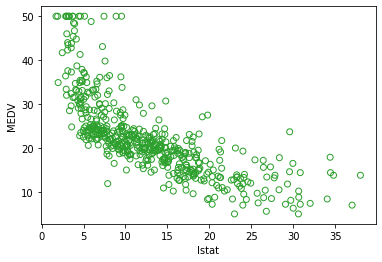

In [9]:
## Scatterplot

plt.scatter(housing_df.lstat, housing_df.medv, color="C2", facecolor="none")
plt.xlabel("lstat")
plt.ylabel("MEDV")

Text(0, 0.5, 'Avg. MEDV')

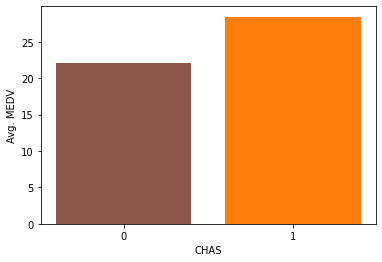

In [10]:
# Barchart of "CHAS" vs mean "MEDV"
data_for_plot = housing_df.groupby("chas").mean().medv
fig, ax = plt.subplots()
ax.bar(data_for_plot.index, data_for_plot, color=["C5", "C1"])
ax.set_xticks([0, 1], minor=False)
ax.set_xlabel("CHAS")
ax.set_ylabel("Avg. MEDV")

Text(0, 0.5, 'cat_medv')

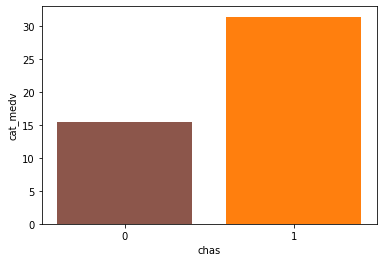

In [11]:
# Barchart of CHAS vs CAT MEDV
data_for_plot = housing_df.groupby("chas").mean()["cat_medv"] * 100
fig, ax = plt.subplots()
ax.bar(data_for_plot.index, data_for_plot, color=["C5", "C1"])
ax.set_xticks([0, 1], minor=False)
ax.set_xlabel("chas")
ax.set_ylabel("cat_medv")

Text(0, 0.5, 'count')

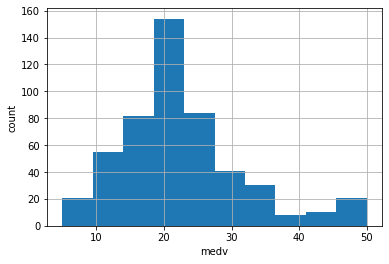

In [12]:
# Histogram of MDV
ax = housing_df.medv.hist()
ax.set_xlabel("medv")
ax.set_ylabel("count")

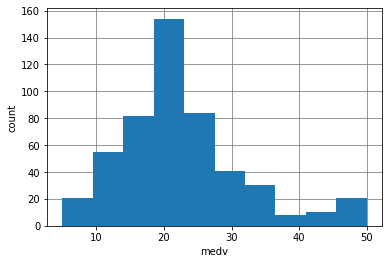

In [13]:
# Alternative plot with matplotlib
fig, ax = plt.subplots()
ax.hist(housing_df.medv)
ax.set_axisbelow(True)
ax.grid(which="major", color="grey", linestyle="-")
ax.set_xlabel("medv")
ax.set_ylabel("count")
plt.show()

Text(0.5, 1.0, '')

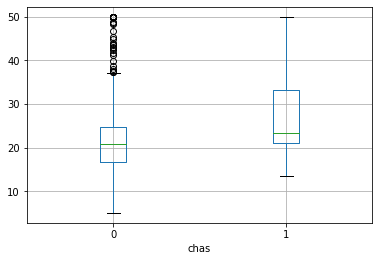

In [14]:
# Boxplot of "medv" for different values of "chas"
ax = housing_df.boxplot(column="medv", by="chas")
plt.suptitle("")  # Suppress the title
plt.title("")

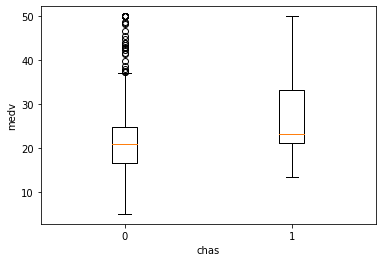

In [15]:
# Alternative plot with matplotlib
data_for_plot = [
    list(housing_df[housing_df.chas == 0].medv),
    list(housing_df[housing_df.chas == 1].medv),
]
fig, ax = plt.subplots()
ax.boxplot(data_for_plot)
ax.set_xticks([1, 2], minor=False)
ax.set_xticklabels([0, 1])
ax.set_xlabel("chas")
ax.set_ylabel("medv")
plt.show()

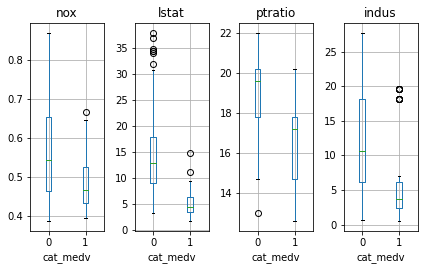

In [16]:
# side-by-side boxplots
fig, axes = plt.subplots(nrows=1, ncols=4)

for idx, column in enumerate(["nox", "lstat", "ptratio", "indus"]):
    housing_df.boxplot(column=column, by="cat_medv", ax=axes[idx])

for ax in axes:
    ax.set_xlabel("cat_medv")

plt.suptitle("")
plt.tight_layout()

## Heatmap: visualizing correlations and missing values

<AxesSubplot:>

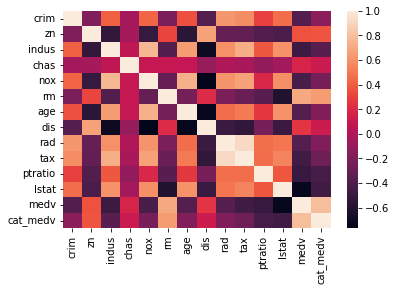

In [17]:
corr = housing_df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

<AxesSubplot:>

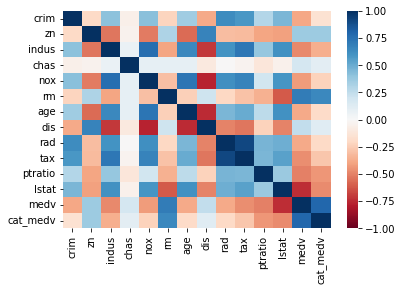

In [18]:
# Change the colormap to a divergent scale and fix the range of the colormap
sns.heatmap(
    corr,
    xticklabels=corr.columns,
    yticklabels=corr.columns,
    vmin=-1,
    vmax=1,
    cmap="RdBu",
)

<AxesSubplot:>

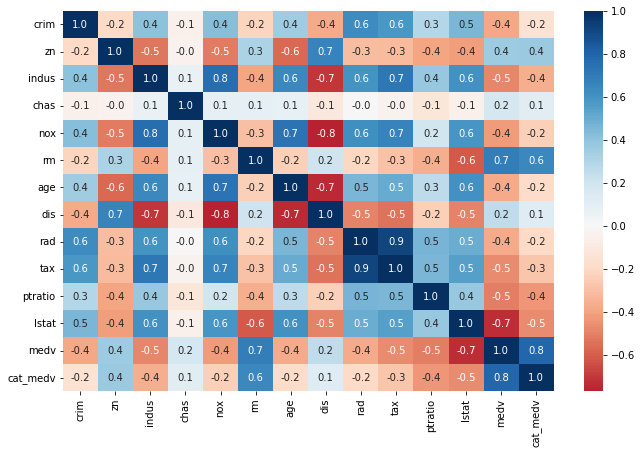

In [19]:
# Include the information aboutvalues (example demonstrates how to control the size of the plot)
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

In [20]:
df = pd.read_csv("./datasets/dmba/NYPD_Motor_Vehicle_Collisions_1000.csv").sort_values(
    ["DATE"]
)
df

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
376,01/01/2014,16:16,MANHATTAN,10030.0,40.817846,-73.941844,"(40.8178464, -73.9418441)",7 AVENUE,WEST 139 STREET,NaN,...,NaN,NaN,NaN,NaN,67960,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
69,01/01/2018,11:00,BRONX,10458.0,40.861700,-73.891390,"(40.8617, -73.89139)",WEBSTER AVENUE,EAST FORDHAM ROAD,NaN,...,NaN,NaN,NaN,NaN,3821610,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,NaN
510,01/02/2013,12:07,STATEN ISLAND,10314.0,40.580618,-74.152529,"(40.5806177, -74.1525287)",FOREST HILL ROAD,RICHMOND HILL ROAD,NaN,...,Unspecified,NaN,NaN,NaN,295943,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN
944,01/03/2014,19:30,STATEN ISLAND,10306.0,40.573786,-74.106423,"(40.5737857, -74.1064233)",HYLAN BOULEVARD,BRYANT AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,300599,AMBULANCE,UNKNOWN,NaN,NaN,NaN
444,01/03/2017,11:44,NaN,NaN,40.721140,-73.942825,"(40.72114, -73.942825)",NORTH HENRY STREET,MEEKER AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,3591243,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
833,12/31/2015,15:25,QUEENS,11385.0,40.713333,-73.913038,"(40.7133332, -73.9130382)",NURGE AVENUE,METROPOLITAN AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,3363187,OTHER,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
171,12/31/2016,5:05,NaN,NaN,40.865166,-73.840500,"(40.865166, -73.8405)",ALLERTON AVENUE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,3590864,TAXI,PASSENGER VEHICLE,NaN,NaN,NaN
435,12/31/2017,4:09,BROOKLYN,11234.0,40.607594,-73.920044,"(40.607594, -73.920044)",NaN,NaN,2590 FLATBUSH AVENUE,...,NaN,NaN,NaN,NaN,3821367,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
6,12/31/2017,3:35,NaN,NaN,40.846090,-73.944756,"(40.84609, -73.944756)",HENRY HUDSON PARKWAY,NaN,NaN,...,NaN,NaN,NaN,NaN,3819338,PASSENGER VEHICLE,NaN,NaN,NaN,NaN


In [21]:
# Given a dataframe, create a copy of the array that is 0 if a field contains a value and 1 for NaN
na_info = np.zeros(df.shape)
na_info[df.isna().values] = 1
na_info = pd.DataFrame(na_info, columns=df.columns)
na_info

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
996,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
998,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0


[]

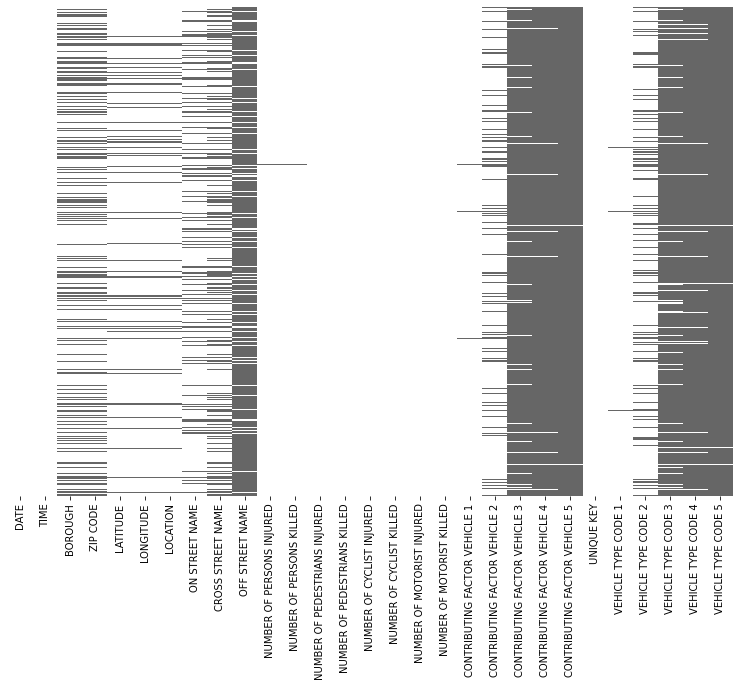

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(13, 9)
ax = sns.heatmap(na_info, vmin=0, vmax=1, cmap=["white", "#666666"], cbar=False, ax=ax)
ax.set_yticks([])

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

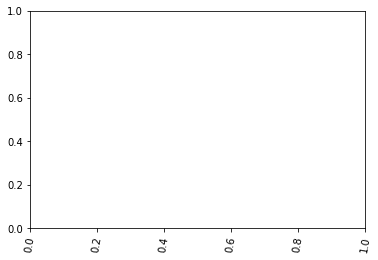

In [23]:
# Draw frame around figuire
rect = plt.Rectangle(
    (0, 0),
    na_info.shape[1],
    na_info.shape[0],
    linewidth=1,
    edgecolor="lightgrey",
    facecolor="none",
)
rect = ax.add_patch(rect)
rect.set_clip_on(False)
plt.xticks(rotation=80)

## Multidimensional visualization

<AxesSubplot:xlabel='lstat', ylabel='nox'>

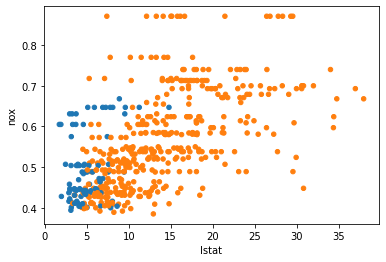

In [24]:
# Color the points by the value of CAT.MEDV
housing_df.plot.scatter(
    x="lstat", y="nox", c=["C0" if c == 1 else "C1" for c in housing_df.cat_medv]
)

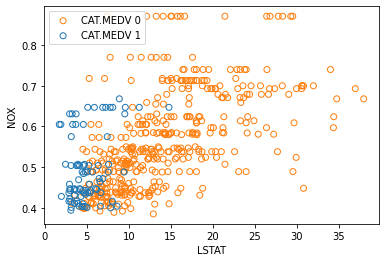

In [25]:
_, ax = plt.subplots()
for cat, color in (0, "C1"), (1, "C0"):
    subset_df = housing_df[housing_df.cat_medv == cat]
    ax.scatter(subset_df.lstat, subset_df.nox, color="none", edgecolor=color)
ax.set_xlabel("LSTAT")
ax.set_ylabel("NOX")
ax.legend(["CAT.MEDV 0", "CAT.MEDV 1"])

Text(3.5, 45, 'CHAS = 1')

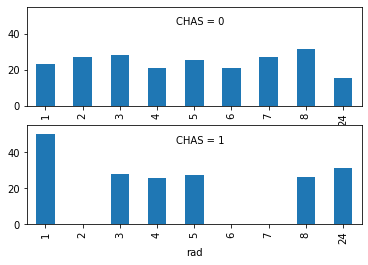

In [26]:
# Panel plot
# Compute mean MEDV per RAD and CHAS
data_for_plot_df = housing_df.groupby(["chas", "rad"]).mean()["medv"]

# We determine all possible RAD values to use as ticks
ticks = set(housing_df.rad)
for i in range(2):
    for t in ticks.difference(data_for_plot_df[i].index):
        data_for_plot_df.loc[(i, t)] = 0

# Reorder to rows, so that the index si sorted.
data_for_plot_df = data_for_plot_df[sorted(data_for_plot_df.index)]

# Determine a common range for the y axis
y_range = [0, max(data_for_plot_df) * 1.1]
fig, axes = plt.subplots(nrows=2, ncols=1)
data_for_plot_df[0].plot.bar(x="rad", ax=axes[0], ylim=y_range)
data_for_plot_df[1].plot.bar(x="rad", ax=axes[1], ylim=y_range)
axes[0].annotate("CHAS = 0", xy=(3.5, 45))
axes[1].annotate("CHAS = 1", xy=(3.5, 45))

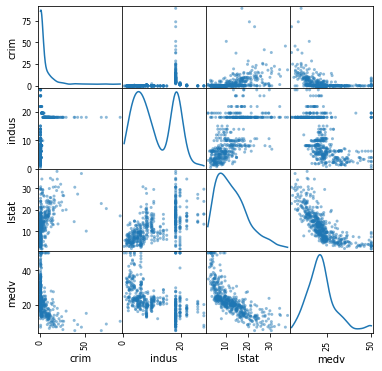

In [27]:
# Scatter plot matrix for MEDV and three numerical predictors
# Display scatterplots between the different variables
# The diagolna shows the distributions for each variable
df = housing_df[["crim", "indus", "lstat", "medv"]]
axes = scatter_matrix(df, alpha=0.5, figsize=(6, 6), diagonal="kde")

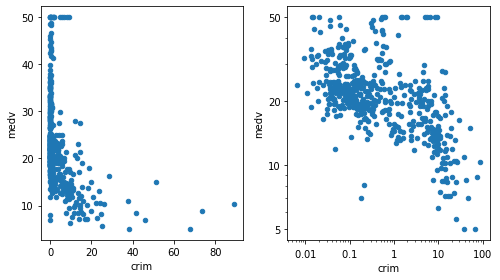

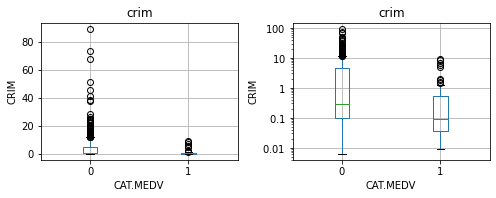

In [28]:
# Avoid the use of scientific notation for the log axis
plt.rcParams["axes.formatter.min_exponent"] = 4

## Scatter plot: regular and log scale
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 4))

# Regular scale
housing_df.plot.scatter(x="crim", y="medv", ax=axes[0])

# Log scale
ax = housing_df.plot.scatter(x="crim", y="medv", logx=True, logy=True, ax=axes[1])
ax.set_yticks([5, 10, 20, 50])
ax.set_yticklabels([5, 10, 20, 50])
plt.tight_layout()

## Boxplot: regular and log scale
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

# Regular scale
ax = housing_df.boxplot(column="crim", by="cat_medv", ax=axes[0])
ax.set_xlabel("CAT.MEDV")
ax.set_ylabel("CRIM")

# Log scale
ax = housing_df.boxplot(column="crim", by="cat_medv", ax=axes[1])
ax.set_xlabel("CAT.MEDV")
ax.set_ylabel("CRIM")
ax.set_yscale("log")

# Suppress the title
axes[0].get_figure().suptitle("")
plt.tight_layout()

## Aggregation and Hierachies

In [29]:
amtrak_df = pd.read_csv("./datasets/dmba/Amtrak.csv")
normalize_columns(amtrak_df)
amtrak_df.month = pd.to_datetime(amtrak_df.month, format="%d/%m/%Y")
amtrak_df.set_index("month", inplace=True)

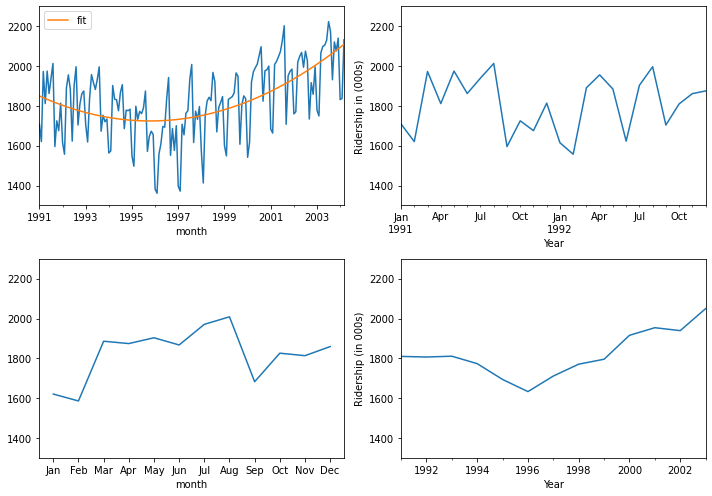

In [30]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))

# Fit quadratic curve and display
quadratic_fit = np.poly1d(np.polyfit(range(len(amtrak_df)), amtrak_df.ridership, 2))
amtrak_fit = pd.DataFrame({"fit": [quadratic_fit(t) for t in range(len(amtrak_df))]})
amtrak_fit.index = amtrak_df.index
ax = amtrak_df.plot(ylim=[1300, 2300], legend=False, ax=axes[0][0])
amtrak_fit.plot(ax=ax)

# Zoom in 2 year period 1/1/1991 to 12/1/1992
ridership_2yrs = amtrak_df.loc["1991-01-01":"1992-12-01"]
ax = ridership_2yrs.plot(ylim=[1300, 2300], legend=False, ax=axes[0][1])
ax.set_xlabel("Year")
ax.set_ylabel("Ridership in (000s)")


# Average by month
by_month = amtrak_df.groupby(by=[amtrak_df.index.month], as_index=True).mean()
ax = by_month.plot(ylim=[1300, 2300], legend=False, ax=axes[1][0])
yticks = [-2.0, -1.75, -1.5, -1.25, -1.0, -0.75, -0.5, -0.25, -0]
ax.set_xticks(range(1, 13))
ax.set_xticklabels([calendar.month_abbr[i] for i in range(1, 13)])


# Average by year (exclude date from 2004)
by_year = amtrak_df.loc["1991-01-01":"2003-12-01"].groupby(pd.Grouper(freq="A")).mean()
ax = by_year.plot(ylim=[1300, 2300], legend=False, ax=axes[1][1])
ax.set_xlabel("Year")
ax.set_ylabel("Ridership (in 000s)")
plt.tight_layout()

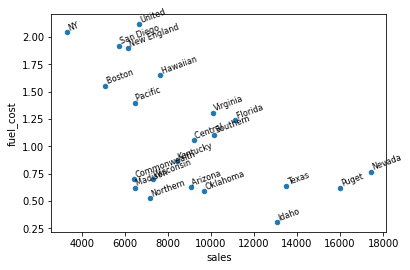

In [31]:
utilities_df = pd.read_csv("./datasets/dmba/Utilities.csv")
normalize_columns(utilities_df)
ax = utilities_df.plot.scatter(x="sales", y="fuel_cost")

# Scatter plot with labeled points.
points = utilities_df[["sales", "fuel_cost", "company"]]
_ = points.apply(
    lambda x: ax.text(
        *x,
        rotation=20,
        horizontalalignment="left",
        verticalalignment="bottom",
        fontsize=8
    ),
    axis=1,
)

In [32]:
def jitter(x, factor=1):
    """Add random jitter to x values"""
    sx = np.array(sorted(x))
    delta = sx[1:] - sx[:-1]
    min_delta = min(d for d in delta if d > 0)
    a = factor * min_delta / 5
    return x + np.random.uniform(-a, a, len(x))

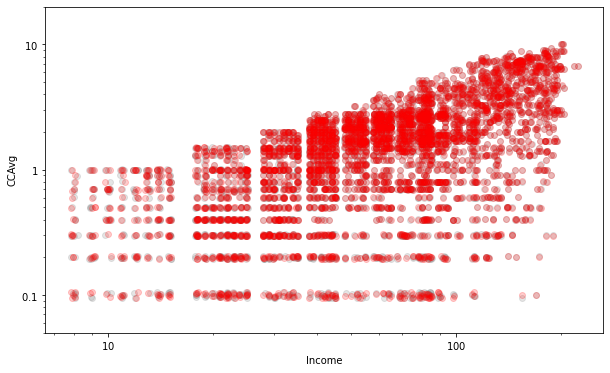

In [33]:
universal_df = pd.read_csv("./datasets/dmba/UniversalBank.csv")
normalize_columns(universal_df)
sa_idx = universal_df[universal_df["securities_account"] == 1].index
plt.figure(figsize=(10, 6))
plt.scatter(
    jitter(universal_df.drop(sa_idx).income),
    jitter(universal_df.drop(sa_idx).ccavg),
    marker="o",
    color="grey",
    alpha=0.2,
)
plt.scatter(
    jitter(universal_df.drop(sa_idx).income),
    jitter(universal_df.drop(sa_idx).ccavg),
    marker="o",
    color="red",
    alpha=0.2,
)
plt.xlabel("Income")
plt.ylabel("CCAvg")
plt.ylim((0.05, 20))
axes = plt.gca()
axes.set_xscale("log")
axes.set_yscale("log")

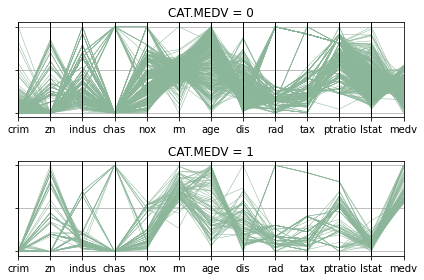

In [34]:
# Multivariante Plot: Parallel Coordinating Plot
# Transform the axes, so that they will all have the same range
min_max_scaler = preprocessing.MinMaxScaler()
data_to_plot = pd.DataFrame(
    min_max_scaler.fit_transform(housing_df), columns=housing_df.columns
)
fig, axes = plt.subplots(nrows=2, ncols=1)
for i in (0, 1):
    parallel_coordinates(
        data_to_plot.loc[data_to_plot.cat_medv == i],
        "cat_medv",
        ax=axes[i],
        linewidth=0.5,
    )
    axes[i].set_title("CAT.MEDV = {}".format(i))
    axes[i].set_yticklabels([])
    axes[i].legend().set_visible(False)
plt.tight_layout()

## Visualizing networked data

(-0.5483685002132054,
 0.5157385044773134,
 -0.515078810301889,
 0.49745868614557726)

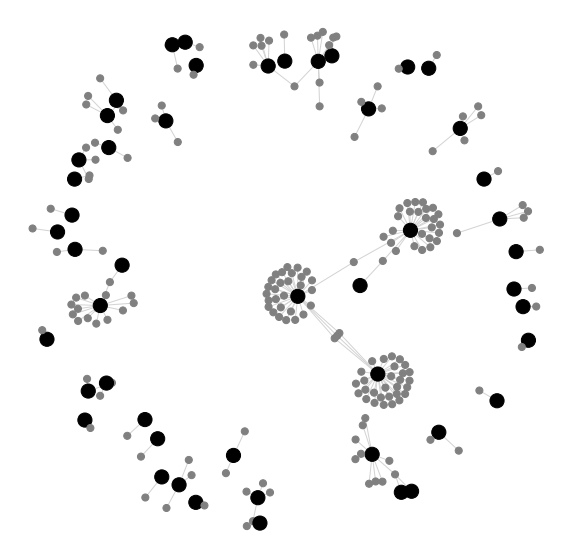

In [35]:
ebay_df = pd.read_csv("./datasets/dmba/eBayNetwork.csv")
G = nx.from_pandas_edgelist(ebay_df, source="Seller", target="Bidder")
is_bidder = [n in set(ebay_df.Bidder) for n in G.nodes()]
pos = nx.spring_layout(G, k=0.13, iterations=60, scale=0.5)
plt.figure(figsize=(10, 10))
nx.draw_networkx(
    G,
    pos=pos,
    with_labels=False,
    edge_color="lightgray",
    node_color=["gray" if bidder else "black" for bidder in is_bidder],
    node_size=[50 if bidder else 200 for bidder in is_bidder],
)
plt.axis("off")

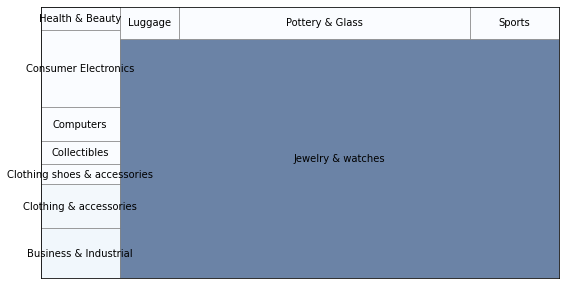

In [36]:
import squarify

ebay_treemap = pd.read_csv("./datasets/dmba/EbayTreemap.csv")
grouped = []

for category, df in ebay_treemap.groupby(["Category"]):
    negative_feedback = sum(df["Seller Feedback"] < 0) / len(df)
    grouped.append(
        {
            "category": category,
            "negative_feedback": negative_feedback,
            "average_bid": df["High Bid"].mean(),
        }
    )
by_category = pd.DataFrame(grouped)
norm = matplotlib.colors.Normalize(
    vmin=by_category.negative_feedback.min(), vmax=by_category.negative_feedback.max()
)
colors = [matplotlib.cm.Blues(norm(values)) for values in by_category.negative_feedback]
fig, ax = plt.subplots()
fig.set_size_inches(9, 5)
squarify.plot(
    label=by_category.category,
    sizes=by_category.average_bid,
    color=colors,
    ax=ax,
    alpha=0.6,
    edgecolor="grey",
)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
plt.subplots_adjust(left=0.1)